In [1]:
import scipy
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
y, sr = librosa.load('data/TakeFive.mp3', mono=True, duration=8, sr=44100, offset=16)

/Users/dimitri/opt/miniconda3/envs/music-gen/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [3]:
Audio(y, rate=sr)

In [4]:
f, t, spec = scipy.signal.spectrogram(y)

In [5]:
log_spec = np.log(spec + 1)
log_spec / log_spec.max()

array([[3.8575786e-04, 4.4570034e-04, 3.0084206e-03, ..., 1.2744061e-02,
        7.2661154e-05, 1.3926140e-03],
       [7.3475152e-02, 1.5746954e-01, 2.0994706e-01, ..., 5.6322655e-03,
        2.9069510e-01, 1.0907558e-01],
       [9.8286323e-02, 6.9341205e-02, 2.0914651e-01, ..., 1.1833527e-01,
        3.1404874e-01, 1.3887940e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

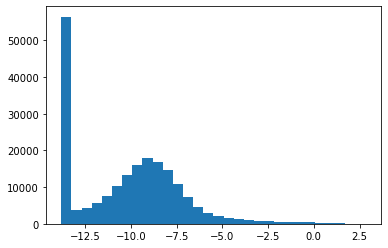

In [6]:
plt.hist(np.log(spec + 1e-6).reshape(-1), bins=30)
plt.show()

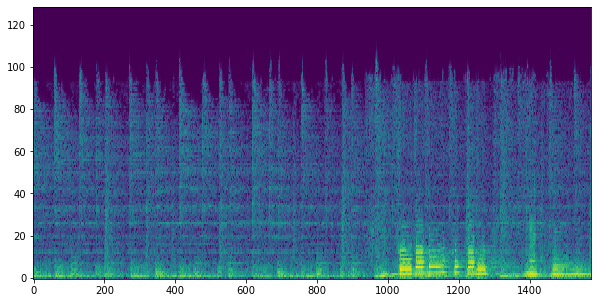

In [7]:
plt.figure(figsize=(10, 5))
plt.imshow(np.log(spec + 1e-6), aspect="auto", interpolation="none", origin="lower")

In [8]:
f, t, z = scipy.signal.stft(y)
mag = np.absolute(z)
phase = np.angle(z)

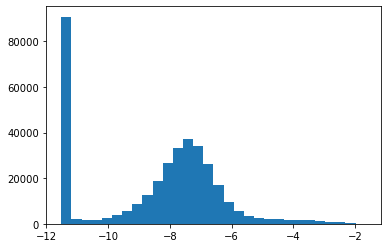

In [9]:
plt.hist(np.log(mag + 1e-5).reshape(-1), bins=30)
plt.show()

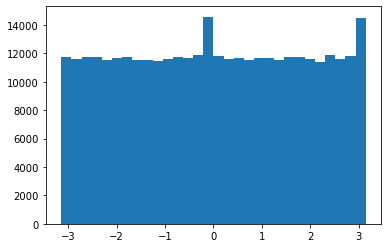

In [10]:
plt.hist(phase.reshape(-1), bins=30)
plt.show()

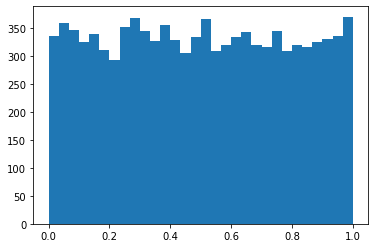

In [11]:
plt.hist(np.random.random(size=(10000,)), bins=30)
plt.show()

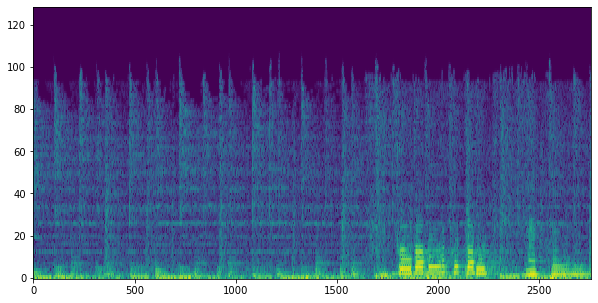

In [406]:
plt.figure(figsize=(10, 5))
plt.imshow(np.log(mag + 1e-4), aspect="auto", interpolation="none", origin="lower")

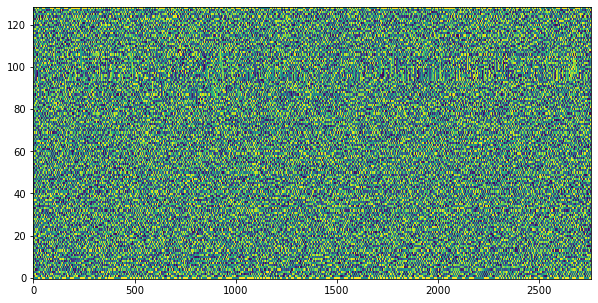

In [407]:
plt.figure(figsize=(10, 5))
plt.imshow(phase, aspect="auto", interpolation="none", origin="lower")

In [408]:
t, x = scipy.signal.istft(z)
Audio(x, rate=sr)

In [422]:
f, t, z = scipy.signal.stft(y)
mag = np.absolute(z)
phase = np.angle(z)

#phase = np.random.random(size=phase.shape)

alpha = 1.0
z.real = mag*np.cos(phase)
z.imag = mag*np.sin(phase)

t, x = scipy.signal.istft(z)
Audio(x, rate=sr)

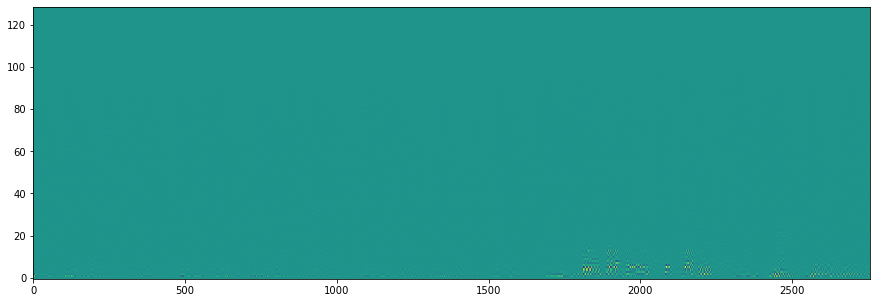

In [427]:
plt.figure(figsize=(15, 5))
plt.imshow(z.imag, aspect="auto", interpolation="none", origin="lower")